In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
baby = Table.read_table('../Data/baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


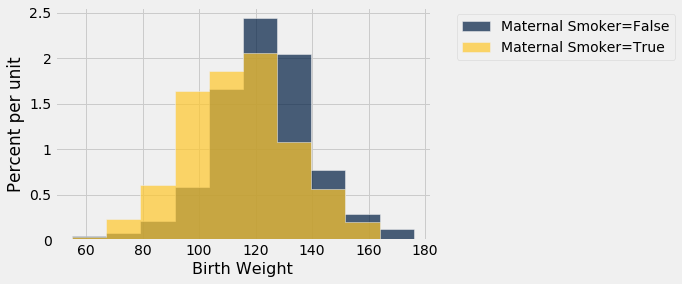

In [5]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [6]:
means_tbl = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_tbl

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [7]:
means = means_tbl.column(1)
observed_difference = means.item(0) - means.item(1)
observed_difference

9.266142572024918

In [8]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

Birth Weight
120
113
128
108
136
138
132
120
143
140


In [9]:
weights.sample(with_replacement=False)

Birth Weight
153
88
142
118
90
91
117
132
114
142


In [10]:
shuffled_weights = weights.sample(with_replacement=False).column(0)

In [11]:
original_and_shuffled = smoking_and_birthweight.with_column(     
    'Shuffled Birth Weight', shuffled_weights
)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Birth Weight
False,120,132
False,113,127
True,128,108
True,108,125
False,136,112
False,138,131
False,132,140
False,120,121
True,143,135
False,140,128


In [12]:
original_and_shuffled.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average,Shuffled Birth Weight average
False,123.085,119.232
True,113.819,119.821


In [13]:
group_labels = baby.select('Maternal Smoker')
group_labels

Maternal Smoker
False
False
True
True
False
False
False
False
True
False


In [14]:
shuffled_weights = weights.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

-1.104307021954071

In [15]:
differences = make_array()

for i in np.arange(5000):
    shuffled_weights = weights.sample(with_replacement=False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
    means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)

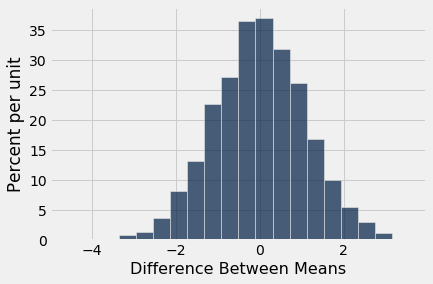

In [16]:
Table().with_column('Difference Between Means', differences).hist(bins=20)

In [17]:
observed_difference

9.266142572024918

In [18]:
## Lecture 8.4

In [19]:
football = Table.read_table('../Data/deflategate.csv')
football

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [20]:
football = football.drop(1, 2).with_column(
    'Combined', (football.column(1) + football.column(2))/2
)
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [21]:
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [22]:
start = np.append(np.ones(11)*12.5, np.ones(4)*13)
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [23]:
drops = start - football.column(1)
drops

array([0.85 , 1.475, 1.175, 1.65 , 1.225, 0.725, 0.425, 1.175, 1.35 ,
       1.8  , 1.375, 0.475, 0.475, 0.275, 0.65 ])

In [24]:
football = football.select('Team').with_column('Drop', drops)

In [25]:
football.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [26]:
means_tbl = football.group('Team', np.average)

In [27]:
means_tbl

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [28]:
means = means_tbl.column(1)
observed_difference = means.item(0)-means.item(1)

In [29]:
observed_difference

-0.733522727272728

In [30]:
group_labels = football.select('Team')
drop_tbl = football.select('Drop')
drop_tbl

Drop
0.85
1.475
1.175
1.65
1.225
0.725
0.425
1.175
1.35
1.8


In [31]:
shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
means = shuffled_tbl.group('Team', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

0.14431818181818146

In [32]:
differences = make_array()

for i in np.arange(20000):
    shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
    means = shuffled_tbl.group('Team', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)

new_difference

-0.02613636363636407

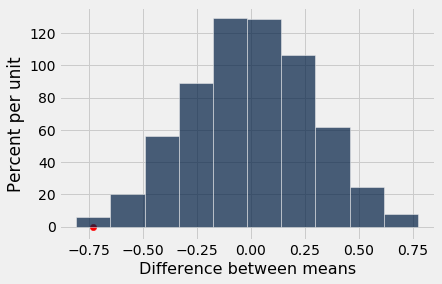

In [33]:
Table().with_column('Difference between means', differences).hist()
plt.scatter(observed_difference, 0, color='red', s=40)

In [34]:
np.count_nonzero(differences <= observed_difference)/20000

0.00315

In [35]:
## practice

In [36]:
football

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [37]:
football = Table.read_table('../Data/deflategate.csv')
football

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [38]:
football = football.with_column('Average', (football.column(1)+football.column(2))/2).drop(1,2)
football

Team,Average
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [39]:
t1 = np.append(np.ones(11)*12.5, np.ones(4)*13)
t1

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [40]:
football = football.with_column('Drop', t1-football.column(1)).drop(1)
football

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [41]:
football.group('Team', np.average)

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [42]:
means = football.group('Team', np.average).column(1)
observed_difference = means.item(0)-means.item(1)
observed_difference

-0.733522727272728

In [43]:
groups = football.select('Team')
all_sample = football.select('Drop')
all_sample

Drop
0.85
1.475
1.175
1.65
1.225
0.725
0.425
1.175
1.35
1.8


In [44]:
shuffled_sample = all_sample.sample(with_replacement=False).column(0)
label_group =groups.with_column('Shuffled drop', shuffled_sample)
means = label_group.group('Team', np.average).column(1)
new_difference = means.item(0)-means.item(1)
new_difference

0.11875000000000047

In [45]:
difference = make_array()

for i in np.arange(20000):
    shuffled_sample = all_sample.sample(with_replacement=False).column(0)
    label_group =groups.with_column('Shuffled drop', shuffled_sample)
    means = label_group.group('Team', np.average).column(1)
    new_difference = means.item(0)-means.item(1)
    difference = np.append(difference, new_difference)

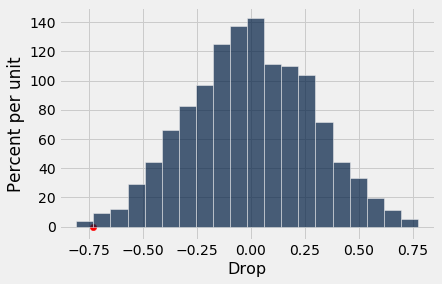

In [46]:
Table().with_column('Drop', difference).hist(bins=20)
plt.scatter(observed_difference, 0, color='red', s=40)

In [47]:
np.count_nonzero(difference <= observed_difference)/20000

0.0033

In [48]:
## Section 9.1

In [49]:
bta = Table.read_table('../Data/bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [50]:
bta.group('Group')

Group,count
Control,16
Treatment,15


In [51]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


In [52]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [53]:
observed_outcomes = Table.read_table('../Data/observed_outcomes.csv')
observed_outcomes.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


In [54]:
bta

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [55]:
obs_proportions = bta.group('Group', np.average).column(1)
obs_proportions

array([0.125, 0.6  ])

In [56]:
observed_distance = abs(obs_proportions.item(0) - obs_proportions.item(1))
observed_distance

0.475

In [57]:
labels = bta.select('Group')
results = bta.select('Result')

In [60]:
shuffled_results = results.sample(with_replacement=False).column(0)
shuffled_tbl = labels.with_column('Shuffled Result', shuffled_results)
proportions = shuffled_tbl.group('Group', np.average).column(1)
new_distance = abs(proportions.item(0) - proportions.item(1))
new_distance

0.041666666666666685

In [61]:
distances = make_array()

for i in np.arange(20000):
    shuffled_results = results.sample(with_replacement=False).column(0)
    shuffled_tbl = labels.with_column('Shuffled Result', shuffled_results)
    proportions = shuffled_tbl.group('Group', np.average).column(1)
    new_distance = abs(proportions.item(0) - proportions.item(1))
    distances = np.append(distances, new_distance)

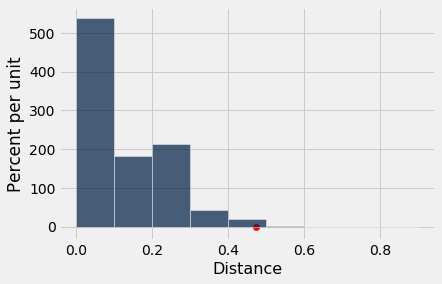

In [62]:
Table().with_column('Distance', distances).hist(bins=np.arange(0,1,0.1))
plt.scatter(observed_distance, 0, color='red', s=40)

In [64]:
np.count_nonzero(distances >= observed_distance)/20000

0.00865